<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Деление-на-выборки" data-toc-modified-id="Деление-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Деление на выборки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Проверка-модели" data-toc-modified-id="Проверка-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re

from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Загрузка и изучение данных

In [2]:
# скачаем данные

df = pd.read_csv('/datasets/toxic_comments.csv', index_col=0)

In [3]:
# рассмотрим все данные, используем для этого функцию

def total_info(data):
    
    print('Общая информация')
    print()
    print(data.info())
    print()
    print('Случайные 5 строк датасета')
    print(data.sample(5))
    print()
    print('Число пропусков', data.isna().sum())
    print()
    print('Число дубликатов', data.duplicated().sum())

In [4]:
total_info(df)

Общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB
None

Случайные 5 строк датасета
                                                     text  toxic
70436                               Yeah, I have sources.      0
91358   I take it you'll be ok with me talking the sam...      0
97986   The Price Is Right \n\nHmmm ... I'm used to se...      0
149750    You have neither, so stop pushing that change.-      0
6114    Take your time, I'll be busy for the next few ...      0

Число пропусков text     0
toxic    0
dtype: int64

Число дубликатов 0


Пропусков и дубликатов в данных нет, но у нас есть столбец 'Unnamed: 0', который не несет в себе никакой дополнительной информации для дальнейших исследований. Удалим его.

Рассмотрим баланс классов.

In [5]:
class_frequency  =  df['toxic'].value_counts(normalize = True)
print(class_frequency)

0    0.898388
1    0.101612
Name: toxic, dtype: float64


Видим, что нетоксичных комментариев значительно больше. Это нужно будет учитывать при обучении моделей.

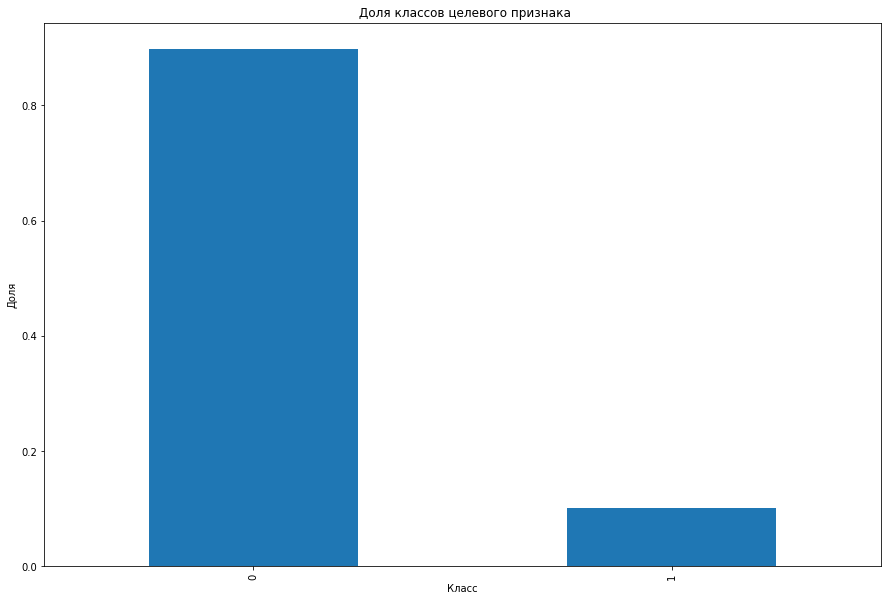

In [6]:
class_frequency.plot(kind = 'bar', figsize=(15, 10))

plt.xlabel('Класс')
plt.ylabel('Доля')
plt.title(' Доля классов целевого признака')

plt.show()

### Лемматизация

In [7]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

In [8]:
# создадим функцию для очистки и лемматизации текстов

def lemmatize_clear_text(text):
    text = text.lower()
    re_text = re.sub(r"[^a-zA-Z']", ' ', text)
    clear_text = " ".join(re_text.split())
    
    lemm_list = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(clear_text)]
    lemm_text = " ".join(lemm_list)
        
    return lemm_text

In [9]:
# добавим в наши данные столбец с лемматизированным текстом

df['lemm_text'] = df['text'].apply(lemmatize_clear_text)

df.sample(5)

,text,toxic,lemm_text
102680,"""\n\n Juniors \n\nThanks for the kind words. Y...",0,junior thanks for the kind word your own work ...
103257,Thank you i will do so!!!!!!!!!!!!!!!!!!!!!!!!...,0,thank you i will do so good bye
71928,REDIRECT Talk:Northeast Delta Dental Stadium,0,redirect talk northeast delta dental stadium
73584,February 2013 (UTC)\n\nplease see the new edit...,0,february utc please see the new edits i make i...
141425,"I'm OK with having the statement, but agree it...",0,i 'm ok with have the statement but agree it c...


### Деление на выборки

In [10]:
# выделим целевой признак и фичи

target = df['toxic']
features = df['lemm_text']

In [11]:
features.head()

0    explanation why the edits make under my userna...
1    d'aww he match this background colour i 'm see...
2    hey man i 'm really not try to edit war it 's ...
3    more i ca n't make any real suggestion on impr...
4    you sir be my hero any chance you remember wha...
Name: lemm_text, dtype: object

In [12]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: toxic, dtype: int64

In [13]:
# разбиваем на обучающую, валидационную и тестовую выборки в соотношении 80/20
# фиксируем random_state
RS = 12345



features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                              target, 
                                                                              test_size=.2, 
                                                                              random_state=RS,
                                                                              stratify=target)

In [14]:
print(f"Количество строк в y_train по классам: {np.bincount(target_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(target_test)}")

Количество строк в y_train по классам: [114484  12949]
Количество строк в y_test по классам: [28622  3237]


In [15]:
# проверяем размеры выборок

samples = [features_train, target_train, features_test, target_test]

for i in samples:
    print(i.shape[0])
    print(round(i.shape[0]/df.shape[0],2))
    print()

127433
0.8

127433
0.8

31859
0.2

31859
0.2



In [19]:
#посчитаем TF-IDF для корпуса текстов



#count_tf_idf = TfidfVectorizer(stop_words=stopwords)

#features_train = count_tf_idf.fit_transform(features_train)
#features_test = count_tf_idf.transform(features_test)

#print(features_train.shape)
#print(features_test.shape)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(127433, 133290)
(31859, 133290)


### Вывод

- Нам была дана таблица с комментариями на 159292 строк, три столбца - с оценкой негатива 0/1 и столбцом 'Unnamed: 0', дублирующим индексы
- Данные не содержали na и дубликатов
- Классы ответов несбалансированы, число нейтральных ответов - составляет порядка 90%

Данные обработали и подготовили к обучению моделей:
- Удалили ненужный столбец
- Провели очистку текста и лемматизацию
- Разделили данные на тренировочную и тестовую выборки
- Посчитали TF-IDF для корпуса текстов

## Обучение

### LogisticRegression

In [18]:
LR_pipeline = Pipeline([("vect", TfidfVectorizer(stop_words='english')), 
                     ("lr", LogisticRegression())])


LR_params = {'lr__C':(0.1, 5, 10),
             'lr__random_state': ([RS]),
             'lr__max_iter': ([200]),
             'lr__class_weight':['balanced']}

LR_clf = GridSearchCV(LR_pipeline, LR_params, scoring='f1',cv=3)
LR_clf.fit(features_train, target_train)

print('F1:', round(LR_clf.best_score_, 2))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

F1: 0.76


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Случайный лес

In [19]:
RF_pipeline = Pipeline([("vect", TfidfVectorizer(stop_words='english')), 
                     ("rf", RandomForestClassifier())])

RF_model = RandomForestClassifier()
    
RF_params = {'rf__n_estimators': [x for x in range(10, 40, 5)],
             'rf__max_depth': [x for x in range(1, 25, 5)],
             'rf__random_state': [RS], 
             'rf__class_weight': ['balanced']}

RF_clf = GridSearchCV(RF_pipeline, RF_params, scoring='f1', cv=3)

RF_clf.fit(features_train, target_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__class_weight': ['balanced'],
                         'rf__max_depth': [1, 6, 11, 16, 21],
                         'rf__n_estimators': [10, 15, 20, 25, 30, 35],
                         'rf__random_state': [12345]},
             scoring='f1')

In [20]:
print("Лучшие параметры модели:")
print()
print(RF_clf.best_params_)

print()
print('F1:', round(RF_clf.best_score_, 2))

Лучшие параметры модели:

{'rf__class_weight': 'balanced', 'rf__max_depth': 21, 'rf__n_estimators': 25, 'rf__random_state': 12345}

F1: 0.4


### CatBoostClassifier

In [22]:
CB_pipeline = Pipeline([("vect", TfidfVectorizer(stop_words='english')), 
                     ("cb", CatBoostClassifier())])
    
CB_params = {'cb__verbose': [False],
             'cb__iterations': [300] } 

CB_clf  = GridSearchCV(CB_pipeline, CB_params, scoring='f1', cv=3)

CB_clf .fit(features_train, target_train)

print('F1:', round(CB_clf.best_score_, 2))

F1: 0.74


### Проверка модели

Лучший показатель F1, и единственный, который соответствует параметрам задачи, показала модель LogisticRegression. Ее и будем тестировать.

In [23]:
predictions_test = LR_clf.predict(features_test)
test_f1 = f1_score(target_test, predictions_test)

print('Финальный F1 для модели LogisticRegression', round(test_f1,2))

Финальный F1 для модели LogisticRegression 0.76


### Вывод

- Обучили на тренировочных данных три модели Логистическая Регрессия, Случайный лес и  CatBoostClassifier
- Худшие показатели у Случайного леса, лучший показатель у Логистической регрессии
- Модель Логистической регрессии показала приемлемый результат F1 = 0.76

## Выводы

- Нам была дана таблица с комментариями на 159292 строк, три столбца - с оценкой негатива 0/1 и столбцом 'Unnamed: 0', дублирующим индексы
- Данные не содержали na и дубликатов
- Классы ответов несбалансированы, число нейтральных ответов - составляет порядка 90%


Данные обработали и подготовили к обучению моделей:

- Удалили ненужный столбец
- Провели очистку текста и лемматизацию
- Разделили данные на тренировочную и тестовую выборки
- Посчитали TF-IDF для корпуса текстов

- Обучили на тренировочных данных три модели Логистическая Регрессия, Случайный лес и CatBoostClassifier
- Худшие показатели у Случайного леса, лучший показатель у Логистической регрессии
- Модель Логистической регрессии показала приемлемый результат F1 = 0.75